In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('company_data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
(df.isnull().sum()/df.shape[0])*100

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

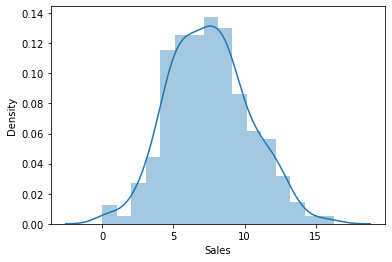

In [7]:
sns.distplot(df['Sales'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

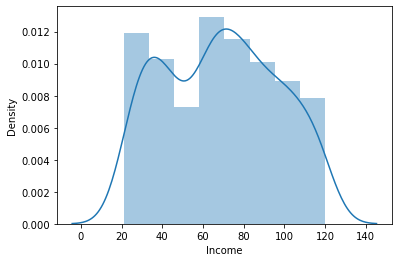

In [8]:
sns.distplot(df['Income'])

<AxesSubplot:xlabel='Population', ylabel='Density'>

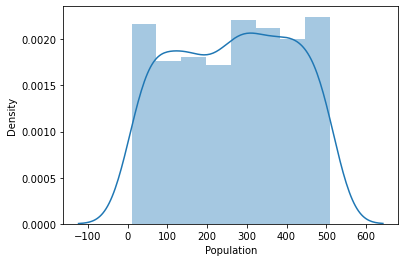

In [9]:
sns.distplot(df['Population'])

<AxesSubplot:xlabel='Population', ylabel='Income'>

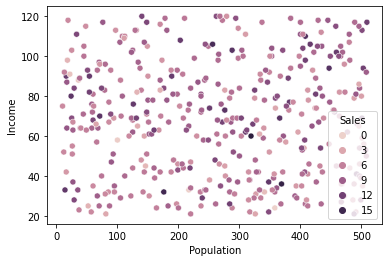

In [10]:
sns.scatterplot(df['Population'],df['Income'],hue=df['Sales'])

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


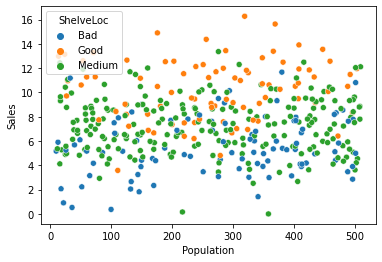

In [11]:
sns.scatterplot(df['Population'],df['Sales'],hue=df['ShelveLoc'])
print(df['ShelveLoc'].value_counts())

<AxesSubplot:xlabel='Sales', ylabel='Income'>

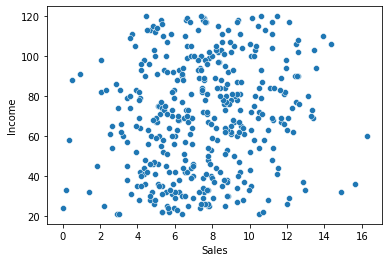

In [12]:
sns.scatterplot(df['Sales'],df['Income'])

<AxesSubplot:xlabel='Sales', ylabel='Advertising'>

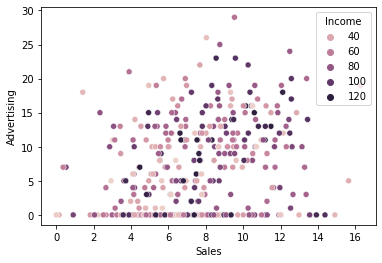

In [13]:
sns.scatterplot(df['Sales'],df['Advertising'],hue=df['Income'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

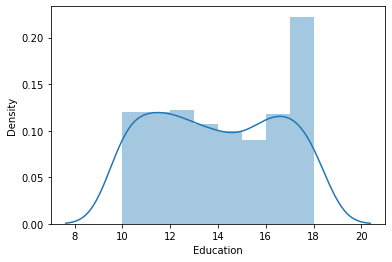

In [14]:
sns.distplot(df['Education'])

In [15]:
df['ShelveLoc']=df['ShelveLoc'].map({'Bad':0,'Good':1,'Medium':2})

In [16]:
df['Urban']=df['Urban'].map({'Yes':1,'No':2})

In [17]:
df['US']=df['US'].map({'Yes':1,'No':0})

In [18]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,2,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


<AxesSubplot:>

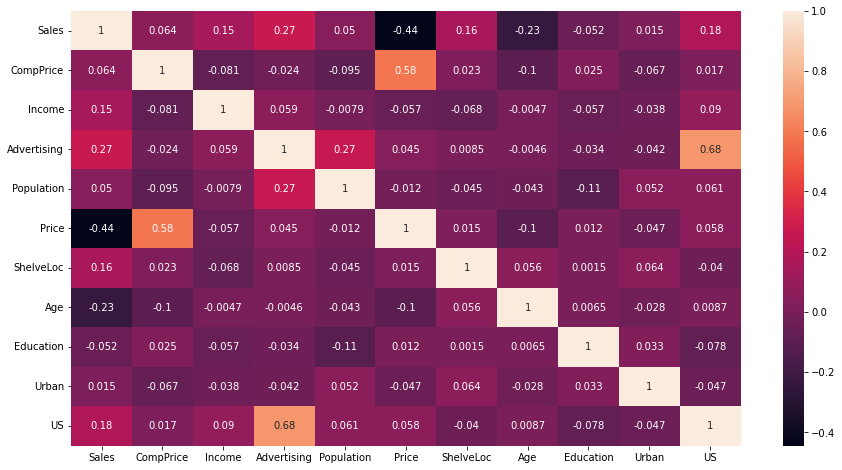

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [20]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [23]:
x=df.iloc[:,:10]
y=df.iloc[:,-1]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 10) (80, 10) (320,) (80,)


In [34]:
logis=LogisticRegression(max_iter=300)
model=logis.fit(x_train,y_train)
x_pred=model.predict(x_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(x_pred,y_train))

0.828125
[[129  23]
 [ 32 136]]


In [35]:
y_pred=model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7625
[[29 10]
 [ 9 32]]


In [36]:
random=RandomForestClassifier(n_estimators=400,criterion='gini',max_features=4,max_samples=60,random_state=0)
model_1=random.fit(x_train,y_train)
x_pred=model_1.predict(x_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(x_pred,y_train))

0.934375
[[150  10]
 [ 11 149]]


In [37]:
y_pred=model_1.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7875
[[30  9]
 [ 8 33]]


In [39]:
random=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features=5,max_samples=80,random_state=0)
model_2=random.fit(x_train,y_train)
x_pred=model_2.predict(x_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(x_pred,y_train))

0.946875
[[154  10]
 [  7 149]]


In [40]:
y_pred=model_2.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8125
[[32  9]
 [ 6 33]]
